# Problem description

### Project: 'Cat and Dog Image Classifier'

For this challenge, you will complete the code to classify images of dogs and cats. You will use TensorFlow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time. (Extra credit if you get it to 70% accuracy!)

Some of the code is given to you but some code you must fill in to complete this challenge. Read the instruction in each text cell so you will know what you have to do in each code cell.

The first code cell imports the required libraries. The second code cell downloads the data and sets key variables. The third cell is the first place you will write your own code.

The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):

<ul type='none'>
  <li>cats_and_dogs</li>
  <li>|__ train:</li>
    <ul type='none'>
      <li>|______ cats: [cat.0.jpg, cat.1.jpg ...]</li>
      <li>|______ dogs: [dog.0.jpg, dog.1.jpg ...]</li>
    </ul>
  <li>|__ validation:</li>
    <ul type='none'>
      <li>|______ cats: [cat.2000.jpg, cat.2001.jpg ...]</li>
      <li>|______ dogs: [dog.2000.jpg, dog.2001.jpg ...]</li>
    </ul>
  <li>|__ test: [1.jpg, 2.jpg ...]</li>
</ul>

You can tweak epochs and batch size if you like, but it is not required.

The following instructions correspond to specific cell numbers, indicated with a comment at the top of the cell (such as # 3).



In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACO

# Problem solution

#### Cell 3

Now it is your turn! Set each of the variables in this cell correctly. (They should no longer equal None.)

Create image generators for each of the three image data sets (train, validation, test). Use ImageDataGenerator to read / decode the images and convert them into floating point tensors. Use the rescale argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the *_data_gen variables, use the flow_from_directory method. Pass in the batch size, directory, target size ((IMG_HEIGHT, IMG_WIDTH)), class mode, and anything else required. test_data_gen will be the trickiest one. For test_data_gen, make sure to pass in shuffle=False to the flow_from_directory method. This will make sure the final predictions stay is in the order that our test expects. For test_data_gen it will also be helpful to observe the directory structure.

After you run the code, the output should look like this:

<ul type='none'>
  <li>Found 2000 images belonging to 2 classes.</li>
  <li>Found 1000 images belonging to 2 classes.</li>
  <li>Found 50 images belonging to 1 class.</li>
</ul>

In [3]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    directory='cats_and_dogs/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory='cats_and_dogs/validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    directory='cats_and_dogs/test',
    target_size=(IMG_WIDTH, IMG_WIDTH),
    batch_size=total_test-1,
    class_mode='binary',
    classes=['.'],
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


#### Cell 4

The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the train_data_gen variable correctly, then running this cell will plot five random training images.

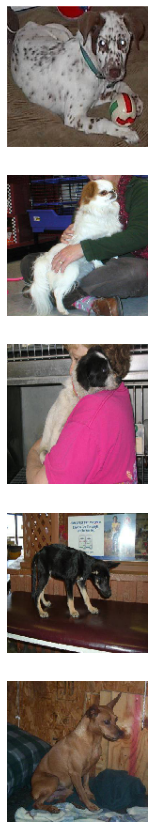

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen) # returns a numpy array containing a batch of images and a numpy array of corresponding labels
plotImages(sample_training_images[:5])


#### Cell 5

Recreate the train_image_generator using ImageDataGenerator.

Since there are a small number of training examples, there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.

In [5]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#### Cell 6

You don't have to do anything for this cell. train_data_gen is created just like before but with the new train_image_generator. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


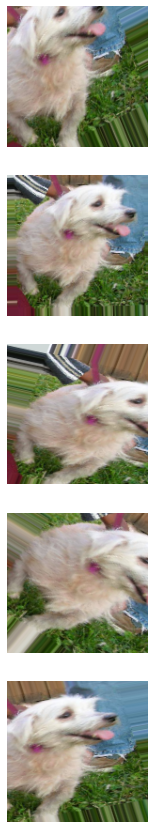

In [6]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

#### Cell 7

In this cell, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

In [7]:
# 7
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten()) # will flatten the 3D output to 1D
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax')) # final dense layer for an output for each of 2 classes

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

#### Cell 8

Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.

In [8]:
# 8
STEP_SIZE_TRAIN = np.ceil(train_data_gen.n/train_data_gen.batch_size)
STEP_SIZE_VALID = np.ceil(val_data_gen.n/val_data_gen.batch_size)

history = model.fit(
    train_data_gen,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=val_data_gen,
    validation_steps=STEP_SIZE_VALID,
    epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 85s 5s/step - loss: 0.7341 - accuracy: 0.4945 - val_loss: 0.6855 - val_accuracy: 0.4930
Epoch 2/15
16/16 [==============================] - 79s 5s/step - loss: 0.6851 - accuracy: 0.5395 - val_loss: 0.6615 - val_accuracy: 0.6060
Epoch 3/15
16/16 [==============================] - 79s 5s/step - loss: 0.6722 - accuracy: 0.5575 - val_loss: 0.6521 - val_accuracy: 0.5830
Epoch 4/15
16/16 [==============================] - 79s 5s/step - loss: 0.6653 - accuracy: 0.5845 - val_loss: 0.6387 - val_accuracy: 0.6220
Epoch 5/15
16/16 [==============================] - 81s 5s/step - loss: 0.6532 - accuracy: 0.5930 - val_loss: 0.6274 - val_accuracy: 0.6210
Epoch 6/15
16/16 [==============================] - 79s 5s/step - loss: 0.6435 - accuracy: 0.6065 - val_loss: 0.6273 - val_accuracy: 0.6370
Epoch 7/15
16/16 [==============================] - 79s 5s/step - loss: 0.6508 - accuracy: 0.5955 - val_loss: 0.6873 - val_accuracy: 0.5910
Epoch 8/15
16/16 [=============

#### Cell 9

Run this cell to visualize the accuracy and loss of the model.

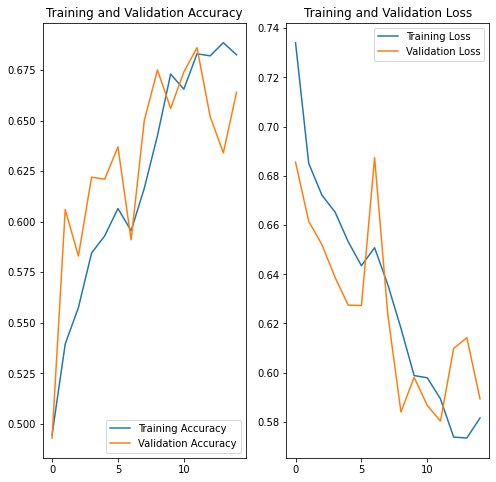

In [9]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Cell 10

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.

Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

After you run the cell, you should see all 50 test images with a label showing the percentage of "sure" that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

In [25]:
# 10
predictions = model.predict(
    test_data_gen
)
predictions # array of [probability that this is a cat, probability that this is a dog] for each test image

1/1 [==============================] - 1s 915ms/step


array([[3.6236706e-01, 6.3763291e-01],
       [6.8945807e-01, 3.1054202e-01],
       [8.5332644e-01, 1.4667365e-01],
       [5.7014368e-02, 9.4298565e-01],
       [3.8752857e-01, 6.1247152e-01],
       [5.0495839e-01, 4.9504149e-01],
       [3.0223921e-01, 6.9776082e-01],
       [7.7475053e-01, 2.2524944e-01],
       [3.2935283e-01, 6.7064720e-01],
       [6.7057814e-03, 9.9329418e-01],
       [6.2565291e-01, 3.7434703e-01],
       [3.6807740e-01, 6.3192260e-01],
       [3.8577333e-01, 6.1422670e-01],
       [7.4276048e-01, 2.5723946e-01],
       [3.0454224e-01, 6.9545776e-01],
       [6.4957045e-02, 9.3504298e-01],
       [2.7462596e-01, 7.2537410e-01],
       [9.9556357e-02, 9.0044367e-01],
       [3.1746334e-01, 6.8253672e-01],
       [2.4526842e-01, 7.5473160e-01],
       [6.4067984e-01, 3.5932010e-01],
       [3.0131185e-01, 6.9868815e-01],
       [3.2360652e-01, 6.7639351e-01],
       [4.4597986e-01, 5.5402017e-01],
       [7.1263146e-01, 2.8736857e-01],
       [4.3955833e-01, 5.

In [30]:
# 10
probabilities = [prediction[1] for prediction in predictions] # probability that this is a dog (class 1) for each test image

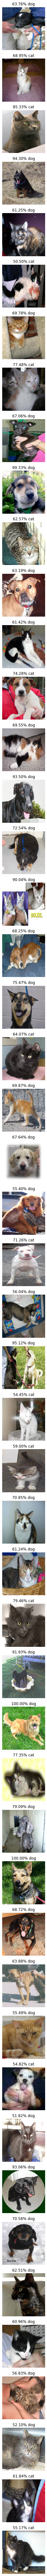

In [27]:
# 10
test_images, _ = next(test_data_gen)
plotImages(test_images, probabilities)

#### Cell 11

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [28]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
